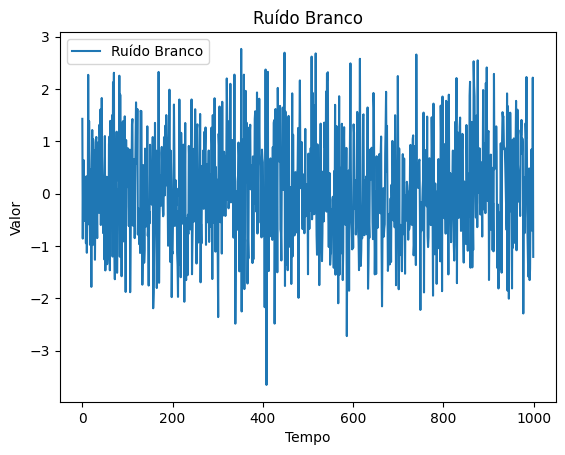

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Defina o tamanho da amostra (número de pontos no ruído branco)
tamanho_amostra = 1000

# Gere um array de valores aleatórios normalmente distribuídos (ruído branco)
ruido_branco = np.random.normal(size=tamanho_amostra)

# Crie um array de índices de tempo (opcional, apenas para visualização)
tempo = np.arange(tamanho_amostra)

# Plote o ruído branco
plt.plot(tempo, ruido_branco, label='Ruído Branco')
plt.title('Ruído Branco')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [18]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  4 21:21:44 2020

@author: Edson Porto da Silva
"""
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import signal

def simulador(R, L, C, a):
    
    V0 = 0                # tensão inicial no capacitor [volts]
    I0 = 0                # corrente inicial no indutor [ampères]
    fq = 1               # frequência da onda quadrada [hertz]
    Vq = 15               # amplitude da onda quadrada [volts]
    w0 = 1/np.sqrt(L*C)   # frequência angular de ressonância [rad/segundo]

    t = np.arange(0,10,0.0001)*(2/10)   # discretização do intervalo de tempo [segundos]
    Vs = Vq*signal.square(2*np.pi*fq*t) # onda quadrada na entrada do circuito

    vC    = np.zeros(len(t))
    x     = np.zeros(len(t))

    # EDO da tensão sobre o capacitor: vc''(t)+(R/L)vc'(t)+vc(t)/LC = vs/LC

    # Solução numérica:
    vC[0] = V0       # condição incial de vc
    x[0]  = I0/C     # condição inicial da derivada vc'(t)
    #
    # Integração numérica via método de Euler:
    deltaT    = t[1]-t[0] # passo de integração
    numPoints = len(t)-1

    for kk in range(0, numPoints):
        vC[kk+1] = vC[kk]+x[kk]*deltaT                                # calcula vc(t+deltaT)
        x[kk+1]  = x[kk]+(-R/L*x[kk]-1/(L*C)*(vC[kk]-Vs[kk]))*deltaT  # calcula vc'(t+deltaT)

    # cálculo das tensões e da corrente partir de vc(t):
    i  = np.append(I0, C*np.diff(vC)/deltaT)    # corrente no circuito
    
    vR = R*i                                    # tensão no resistor
    vL = Vs-vR-vC                               # tensão no indutor(LKT)
    
    # Restante do seu código...

    # Código para adicionar ruído branco
    desvio_padrao_ruido = 0.007  # Ajuste conforme necessário
    ruido_branco = np.random.normal(0, desvio_padrao_ruido, len(t)) # O zero é da média
    i_ruidosa = i + ruido_branco

    # Código para plotar a onda de corrente original e a ruidosa
    if a == 1:
        plt.figure(figsize=(10, 7), dpi=100)
        plt.plot(t, i, color="black", label='Corrente Original')
        plt.legend()
        plt.grid(color='k', linestyle='--', linewidth=0.1)
        plt.xlabel('tempo (s)', fontsize=14)
        plt.ylabel('ampères (A)', fontsize=14)
        plt.figure(figsize=(10, 7), dpi=100)
        plt.plot(t, i_ruidosa, color="red", label='Corrente com Ruído Branco')
        plt.legend()
        plt.grid(color='k', linestyle='--', linewidth=0.1)
        plt.xlabel('tempo (s)', fontsize=14)
        plt.ylabel('ampères (A)', fontsize=14)
        #plt.savefig(f'meu_grafico_ruidoso_{grafico}.jpg', format='jpg')
        plt.show(block=False)


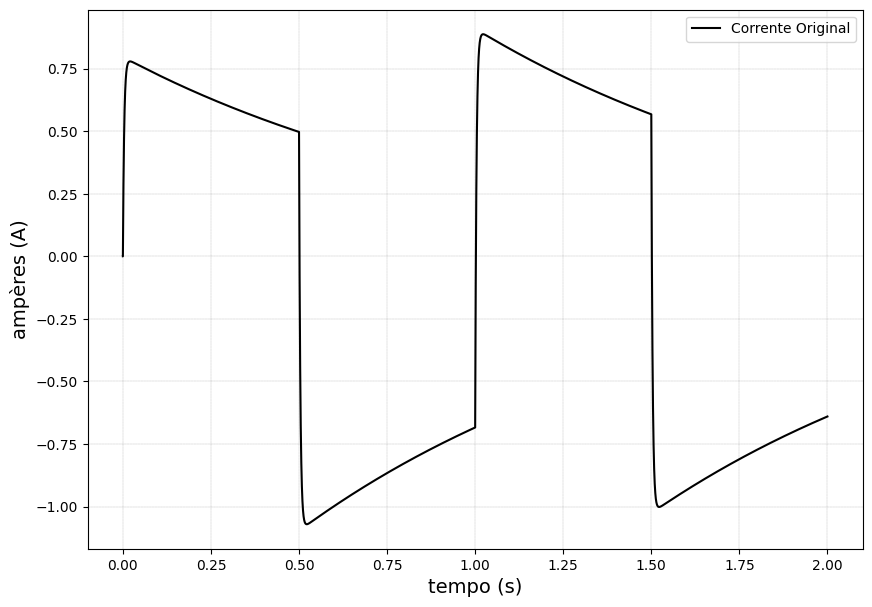

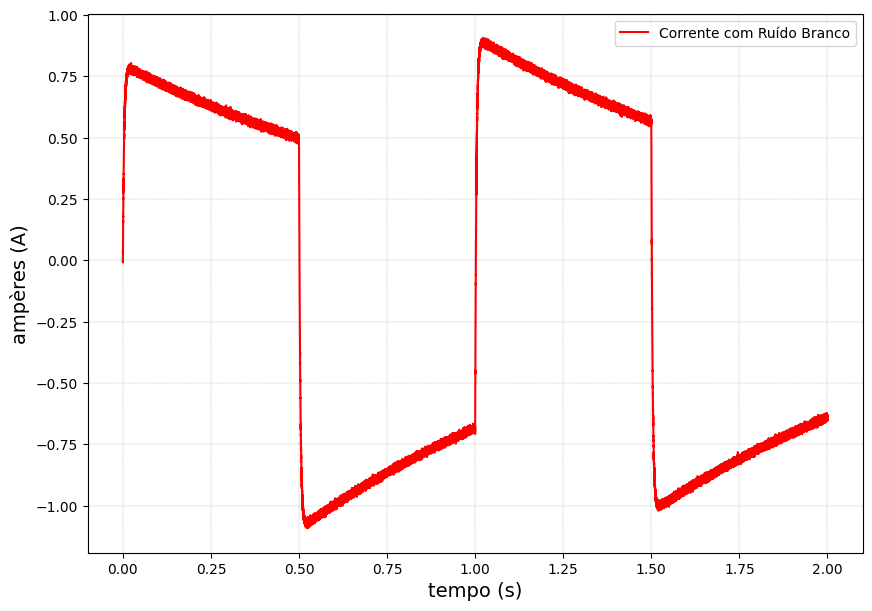

In [19]:
simulador(1.89570503e+01,  6.84422180e-02 , 5.60546219e-02,1)

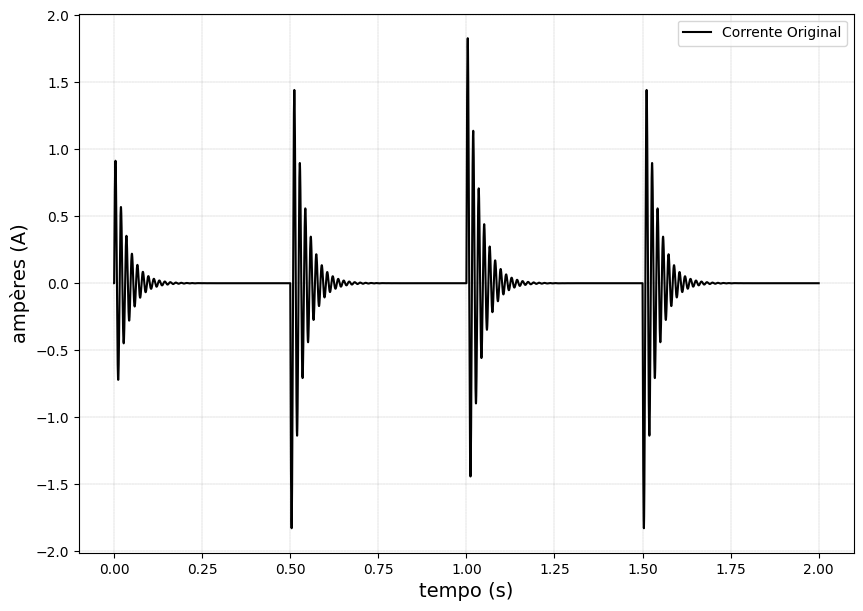

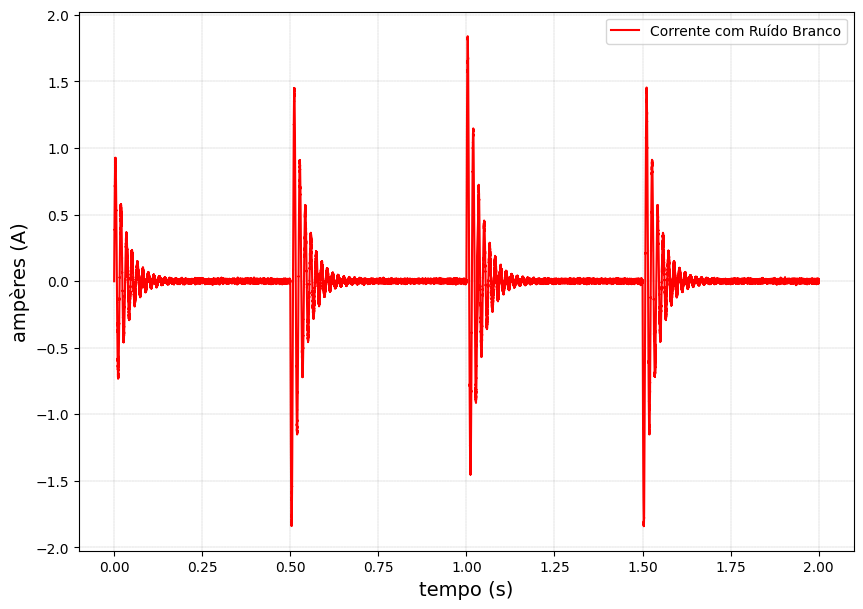

In [20]:
simulador( 2.32412100e+00,  3.62181589e-02 , 1.68750412e-04,1)